<center><h1>Quora Question Pairs</h1></center>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from sklearn import datasets
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os
import gc
import re
from nltk.corpus import stopwords
# import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords
import	re	#	Regular	expression	library
import	string
from nltk.stem import WordNetLemmatizer
from	nltk.tokenize	import	word_tokenize
import gensim
from gensim.parsing.preprocessing import remove_stopwords 
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('train.csv')
df

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


# Exploratory data analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [4]:
missing = pd.DataFrame(df.isnull().sum(), columns=['Missing value '])

cm = sns.light_palette("blue", as_cmap=True)
missing.style.background_gradient(cmap=cm)

,Missing value
id,0
qid1,0
qid2,0
question1,1
question2,2
is_duplicate,0


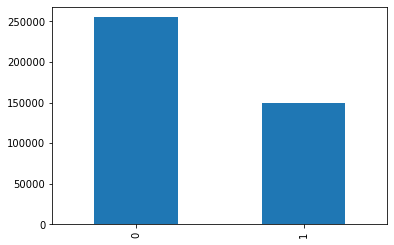

In [5]:
df["is_duplicate"].value_counts().plot(kind='bar')
plt.show()

In [6]:
print("Question pairs are not Similar (is_duplicate = 0):  {}%".format(100 - round(df["is_duplicate"].mean()*100,2)))
print("Question pairs are Similar (is_duplicate =1):   {}%".format(round(df["is_duplicate"].mean()*100,2)))

Question pairs are not Similar (is_duplicate = 0):  63.08%
Question pairs are Similar (is_duplicate =1):   36.92%


In [7]:
qids = pd.Series(df["qid1"].tolist() + df["qid2"].tolist())
unique_qs = len(np.unique(qids))
print ('Total number of  Unique Questions are: {}\n'.format(unique_qs))


qs_morethan_onetime = np.sum(qids.value_counts()>1)

print ('Number of unique questions that appear more than one time: {} ({}%)\n'.format(qs_morethan_onetime,qs_morethan_onetime/unique_qs*100))

print ('Max number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 

q_vals=qids.value_counts()

q_vals=q_vals.values

Total number of  Unique Questions are: 537933

Number of unique questions that appear more than one time: 111780 (20.77953945937505%)

Max number of times a single question is repeated: 157



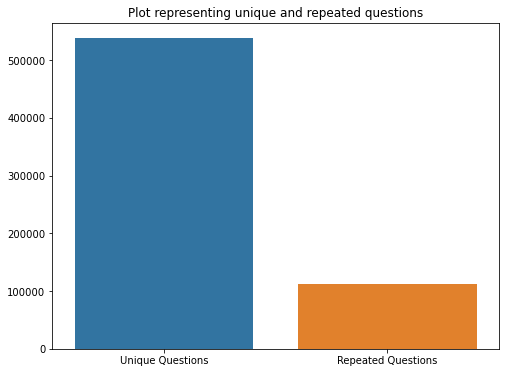

In [8]:
x = ["Unique Questions","Repeated Questions"]
y = [unique_qs,qs_morethan_onetime]
plt.figure(figsize=(8,6))
plt.title("Plot representing unique and repeated questions")
sns.barplot(x,y)
plt.show()

In [9]:
#Checking whether there are any rows with null values
nan_rows = df[df.isnull().any(1)]
print(nan_rows)

            id    qid1    qid2                         question1  \
105780  105780  174363  174364    How can I develop android app?   
201841  201841  303951  174364  How can I create an Android app?   
363362  363362  493340  493341                               NaN   

                                                question2  is_duplicate  
105780                                                NaN             0  
201841                                                NaN             0  
363362  My Chinese name is Haichao Yu. What English na...             0  


In [10]:
df_na = df.fillna('')
nan_rows = df_na[df_na.isnull().any(1)]
print(nan_rows)

Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate]
Index: []


In [11]:
df.dropna()  

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [12]:
df_na.isnull().count()

id              404290
qid1            404290
qid2            404290
question1       404290
question2       404290
is_duplicate    404290
dtype: int64

In [13]:
df['q1len'] = df['question1'].str.len() 
df['q2len'] = df['question2'].str.len()


In [14]:
df['q1_num_words'] = df_na['question1'].apply(lambda row: len(row.split(" ")))
df['q2_num_words'] = df_na['question2'].apply(lambda row: len(row.split(" ")))

(-0.5, 1439.5, 1079.5, -0.5)

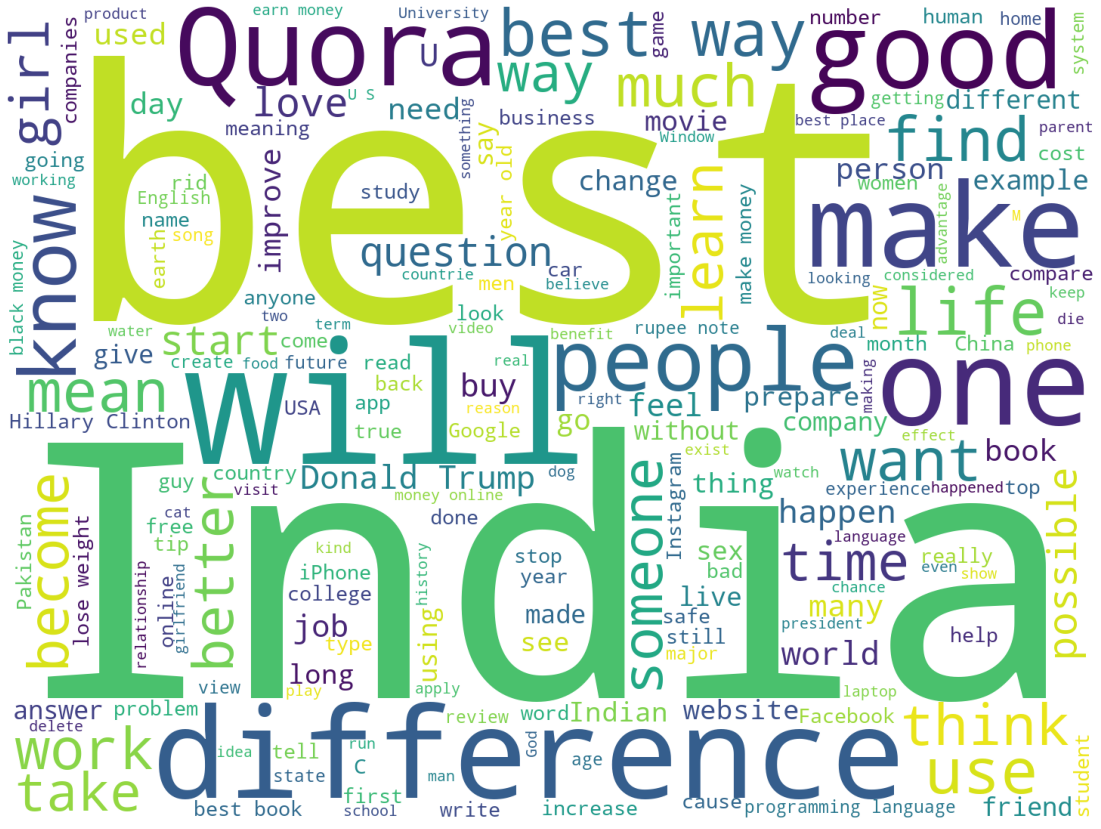

In [15]:
from wordcloud import WordCloud
cloud = WordCloud(width=1440, height=1080,background_color="white").generate(" ".join(df['question1'].astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

(-0.5, 1439.5, 1079.5, -0.5)

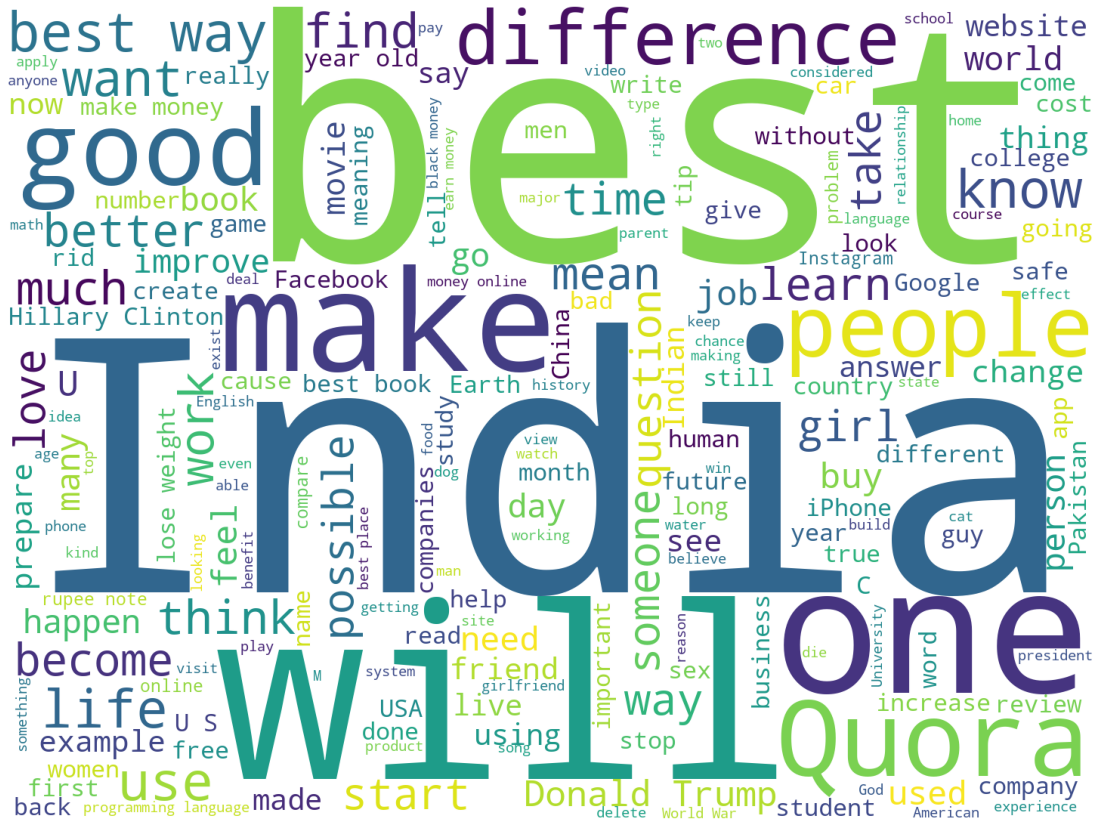

In [16]:
from wordcloud import WordCloud
cloud = WordCloud(width=1440, height=1080,background_color="white").generate(" ".join(df['question2'].astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

In [17]:
"""def normalized_word_share(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1']))
    w2 = set(map(lambda word: word.lower().strip(), row['question2']))   
    return 1.0 * len(w1 & w2)/(len(w1) + len(w2))


df['word_share'] = df.apply(normalized_word_share, axis=1)
"""

"def normalized_word_share(row):\n    w1 = set(map(lambda word: word.lower().strip(), row['question1']))\n    w2 = set(map(lambda word: word.lower().strip(), row['question2']))   \n    return 1.0 * len(w1 & w2)/(len(w1) + len(w2))\n\n\ndf['word_share'] = df.apply(normalized_word_share, axis=1)\n"

In [18]:
"""plt.figure(figsize=(12, 8))
plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_share', data = df[0:50000])
plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['word_share'][0:10000], color = 'green')
sns.distplot(df[df['is_duplicate'] == 0.0]['word_share'][0:10000], color = 'red')"""

"plt.figure(figsize=(12, 8))\nplt.subplot(1,2,1)\nsns.violinplot(x = 'is_duplicate', y = 'word_share', data = df[0:50000])\nplt.subplot(1,2,2)\nsns.distplot(df[df['is_duplicate'] == 1.0]['word_share'][0:10000], color = 'green')\nsns.distplot(df[df['is_duplicate'] == 0.0]['word_share'][0:10000], color = 'red')"

In [19]:
df=df.sample(100,random_state=22)

In [20]:
#printing few question pairs in the datset
#for i in range(0,100):
#    print(df.question1[i])
 #   print(df.question2[i])
  

In [21]:
df.shape

(100, 10)

In [22]:
X, y = df[df.columns[3:5]], df['is_duplicate']

# NLP for Supervised Learning

### Classification of similar questions :
- Text Preprocessing


In [23]:
#pip install -U textblob
stop_words = ['i','am','me','should','be','s','us','should','by','its','di','in','the','are','can','was','a','on','for','from','an','do','does','you','and','but','if','or','because','as','what','which','this','that','these','those','then',
             'just','so','than','when','would','your','how','they','it','why','such','will','both','through','about','for','is','of','while','during','to']

In [24]:
from token import *
# Clean the text, with the option to remove stop_words and to stem words.
def normalized_text(text,stem_words=True):
    if pd.isnull(text):  #If null
        return ''

     # Clean the text
    # add padding to punctuations and special chars, we still need them later
    text = re.sub('\&', "and", text)
    
    # cleaning text
    text = re.sub(r"US", "America", text)
    text = re.sub(r" \w*\d\w*", "", text)
    text = re.sub(r" \w*\d\*", "", text)
    text = re.sub(r" UK ", "England", text)
    text = re.sub(r" J K ", "JK", text)
    text = re.sub(r'“如果不靠欺骗自己，还能靠什么支撑自己走下去”','If you don’t rely on deceiving yourself, what else can you rely on to support yourself',text)
    text = re.sub(r'没出息','unpromising',text)
    text = re.sub(r'シ instead of し','instead of',text)
    text = re.sub(r'’|‘','',text)
    text = re.sub("\'s", "", text)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    # Removing multiple spaces
    text = re.sub(r'\s+', ' ', text)
    # Remove single characters from the start
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text) 
     # Remove all the special characters
    text = re.sub(r'\W', ' ', text)
    
    #Removing Punctuations
    punctuation=string.punctuation
    text = [word for word in text if word not in punctuation]
    text = ''.join(text)
    text= text.lower()
    
    text = text.split()
    text = [w for w in text if not w in stop_words]
    text = " ".join(text)
    
    stemmer = WordNetLemmatizer()
    # Lemmatization
    text = [stemmer.lemmatize(word) for word in text]
    text = ''.join(text)
    # Return a list of words
    return text

In [25]:
from textblob import TextBlob

In [26]:
punctuation=string.punctuation
print(punctuation)


!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [27]:
#applying text cleaning function to question text
X['question1'] = X['question1'].apply(normalized_text)
X['question2'] = X['question2'].apply(normalized_text)

In [28]:
X['question1'].head(10)

225778                    risks hormone replacement therapy
338987                                      tell person gay
2723                                clear ibps po one month
130910    were major effects cambodia earthquake effects...
249071                     funniest joke ve ever heard read
247664                              sean combs rich wealthy
8881      all bank po exam best book especially reasonin...
227016                             opd hospitals importance
285032                      like work at tree com first job
367538                              eat my appendix removed
Name: question1, dtype: object

In [29]:
X['question2'].head(10)

225778                     hormone replacement therapy risk
338987                                             know gay
2723                         prepare ibps po exam one month
130910    were major effects cambodia earthquake effects...
249071                            best joke have ever heard
247664                     did sean combs accumulate wealth
8881      best most complete books sbi po associate ibps...
227016                        did hospitals first originate
285032                    like work at stamps com first job
367538                         eat after operation appendix
Name: question2, dtype: object

In [30]:
from nltk.corpus import stopwords

X['question1'] = X['question1'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop_words))
X['question2'] = X['question2'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop_words))


In [31]:
#print(stop)

In [32]:
#printing few question pairs in the datset after clean
#for i in range(0,100):
#    print(X.question1[i])
#    print(X.question2[i])
  

In [33]:
X_question1=X['question1'].astype(str)
X_question2=X['question2'].astype(str)
print(X_question1.dtypes)

object


In [34]:
# converting ;FRUIT_NAME' column into list
a = list(X['question1'])
  
# converting list into string and then joining it with space
b = ','.join(str(e) for e in a)

In [35]:
textBlb = TextBlob(b)            # Making our first textblob
textCorrected_1= textBlb.correct()   # Correcting the text
print(textCorrected_1)

risks harmony replacement therapy,tell person gay,clear is po one month,were major effects cambodia earthquake effects compare cascade earthquake,funniest joke ve ever heard read,seen combs rich wealthy,all bank po exam best book especially reasoning quanti,old hospitals importance,like work at tree com first job,eat my appendix removed,weight loss strategy works,health benefits wasabi,prepare abercrombie fitch group interview,some examples belief perseverance,way hack whatsapp,strongest major terms job prospects nearest major at american,widest question ve seen opinion quota,many devices available network address 56 42 0 25,best places visit go vacation,wish learned school,open snapchat message without other person knowing opened,who kid christopher walked impressions video wearing yellow shirt free range chicken,fix windows defender error code,get penza free,we master one programming language learn multiple,don t support pp,install pobox mac,some things new employees know going into 

In [36]:
# converting ;questions' column into list
f = list(X['question2'])
  
# converting list into string and then joining it with space
c = ','.join(str(e) for e in f)

In [37]:
textBlb2 = TextBlob(c)            # Making our first textblob
textCorrected_2 = textBlb.correct()   # Correcting the text
print(textCorrected_2)

risks harmony replacement therapy,tell person gay,clear is po one month,were major effects cambodia earthquake effects compare cascade earthquake,funniest joke ve ever heard read,seen combs rich wealthy,all bank po exam best book especially reasoning quanti,old hospitals importance,like work at tree com first job,eat my appendix removed,weight loss strategy works,health benefits wasabi,prepare abercrombie fitch group interview,some examples belief perseverance,way hack whatsapp,strongest major terms job prospects nearest major at american,widest question ve seen opinion quota,many devices available network address 56 42 0 25,best places visit go vacation,wish learned school,open snapchat message without other person knowing opened,who kid christopher walked impressions video wearing yellow shirt free range chicken,fix windows defender error code,get penza free,we master one programming language learn multiple,don t support pp,install pobox mac,some things new employees know going into 

In [38]:
def Convert(string):
    li = list(string.split(","))
    return li
list_textCorrected_1=Convert(textCorrected_1)
print(list_textCorrected_1)

['risks harmony replacement therapy', 'tell person gay', 'clear is po one month', 'were major effects cambodia earthquake effects compare cascade earthquake', 'funniest joke ve ever heard read', 'seen combs rich wealthy', 'all bank po exam best book especially reasoning quanti', 'old hospitals importance', 'like work at tree com first job', 'eat my appendix removed', 'weight loss strategy works', 'health benefits wasabi', 'prepare abercrombie fitch group interview', 'some examples belief perseverance', 'way hack whatsapp', 'strongest major terms job prospects nearest major at american', 'widest question ve seen opinion quota', 'many devices available network address 56 42 0 25', 'best places visit go vacation', 'wish learned school', 'open snapchat message without other person knowing opened', 'who kid christopher walked impressions video wearing yellow shirt free range chicken', 'fix windows defender error code', 'get penza free', 'we master one programming language learn multiple', '

In [39]:
def Convert(string):
    li = list(string.split(","))
    return li
list_textCorrected_2=Convert(textCorrected_2)
print(list_textCorrected_2)

['risks harmony replacement therapy', 'tell person gay', 'clear is po one month', 'were major effects cambodia earthquake effects compare cascade earthquake', 'funniest joke ve ever heard read', 'seen combs rich wealthy', 'all bank po exam best book especially reasoning quanti', 'old hospitals importance', 'like work at tree com first job', 'eat my appendix removed', 'weight loss strategy works', 'health benefits wasabi', 'prepare abercrombie fitch group interview', 'some examples belief perseverance', 'way hack whatsapp', 'strongest major terms job prospects nearest major at american', 'widest question ve seen opinion quota', 'many devices available network address 56 42 0 25', 'best places visit go vacation', 'wish learned school', 'open snapchat message without other person knowing opened', 'who kid christopher walked impressions video wearing yellow shirt free range chicken', 'fix windows defender error code', 'get penza free', 'we master one programming language learn multiple', '

In [40]:
len(list_textCorrected_1)

100

In [41]:
len(list_textCorrected_2)

100

In [42]:
X2 = pd.DataFrame({'question1':list_textCorrected_1,'question2':list_textCorrected_2})

- Training and Test Sets


In [43]:
X2.tail(10)

,question1,question2
90,money brings happiness richest persons still n...,money brings happiness richest persons still n...
91,english think americans,english think americans
92,happen there no goose,happen there no goose
93,don t kiss like talk their day their parents g...,don t kiss like talk their day their parents g...
94,get payment gateway credit card debit card pro...,get payment gateway credit card debit card pro...
95,best real estate webster morocco,best real estate webster morocco
96,under category null matrix belong positive def...,under category null matrix belong positive def...
97,signs guy likes,signs guy likes
98,easily pass 278 exam,easily pass 278 exam
99,fox news support donald tramp,fox news support donald tramp


In [44]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)

- Converting Text to Numbers

In [45]:

# The first document-term matrix has default Count Vectorizer values - counts of unigrams
from sklearn.feature_extraction.text import CountVectorizer

cv1 = CountVectorizer(stop_words='english')

X_train_cv1 = cv1.fit_transform(X_train)
X_test_cv1  = cv1.transform(X_test)

pd.DataFrame(X_train_cv1.toarray(), columns=cv1.get_feature_names()).head()

,question1,question2
0,1,0
1,0,1


- Training Text Classification Model and Predicting 


#### Try classifying using Logistic Regression

In [46]:
# Create a logistic regression model to use
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [47]:
# Train the first model
lr.fit(X_train_cv1, y_train)
y_pred_cv1 = lr.predict(X_test_cv1)

ValueError: Found input variables with inconsistent numbers of samples: [2, 80]

- Evaluating The Model
- Saving and Loading the Model

In [ ]:
# Create a function to calculate the error metrics, since we'll be doing this several times
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def conf_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, xticklabels=['predicted_negative', 'predicted_positive'], 
                yticklabels=['actual_negative', 'actual_positive'], annot=True,
                fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");

    true_neg, false_pos = cm[0]
    false_neg, true_pos = cm[1]

    accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
    precision = round((true_pos) / (true_pos + false_pos),3)
    recall = round((true_pos) / (true_pos + false_neg),3)
    f1 = round(2 * (precision * recall) / (precision + recall),3)

    cm_results = [accuracy, precision, recall, f1]
    return cm_results

In [ ]:
# The heat map for the first logistic regression model
cm1 = conf_matrix(y_test, y_pred_cv1)

# Topic Modeling with Matrix Factorization

 #### Topic Modelling  of questions :

- Removing stopwords and punctuation marks
- Stemming
- Lemmatization
- Encoding them to ML language using Countvectorizer or Tfidf vectorizer

In [ ]:
list_questions  = np.array(X[['question1','question2']].values.tolist())

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
doc_word = vectorizer.fit_transform(list_questions)
doc_word.shape

In [ ]:
# We have to convert `.toarray()` because the vectorizer returns a sparse matrix.
# For a big corpus, we would skip the dataframe and keep the output sparse.
pd.DataFrame(doc_word.toarray(), index=list_questions, columns=vectorizer.get_feature_names()).head(10)

In [ ]:
# Acronynms: Latent Semantic Analysis (LSA) is just another name for 
#  Signular Value Decomposition (SVD) applied to Natural Language Processing (NLP)
lsa = TruncatedSVD(2)
doc_topic = lsa.fit_transform(doc_word)
lsa.explained_variance_ratio_

In [ ]:
topic_word = pd.DataFrame(lsa.components_.round(3),
             index = ["component_1","component_2"],
             columns = vectorizer.get_feature_names())
topic_word